
# The energy balance and the PFR



-   For the plug flow reactor the energy balance we will use for a single reaction is

\begin{equation}
\frac{dT}{dV} = \frac{-\Delta H_{Rx}(T) r + \dot{Q}}{\sum F_i C_{P,i}}
\end{equation}

![img](./images/differential-energy-balance.png)

-   This will in general just add an equation to the mole balance to be solved simultaneously




## An adiabatic plug flow reactor example



-   We consider the endothermic reaction $A \rightarrow B + C$ in an adiabatic PFR ($\dot{Q} = 0$)



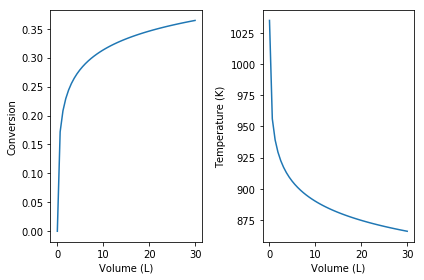

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Fa0 = 0.0376      # mol/s
Ca0 = 0.0188      # mol / L

v0 = Fa0 / Ca0    # initial volumetric flow
Ft0 = Fa0

T0 = 1035.0       # K

# thermal properties
Hrxn_298 = 80.77   # kJ/mol at 298K
Cpa = 0.1630       # kJ/mol/K
Cpb = 0.083
Cpc = 0.071

def adiabatic_pfr(Y, V):
    Fa, T = Y  # unpack variables

    extent = (Fa - Fa0) / (-1.0)
    Fb = extent
    Fc = extent

    Ft = Fa + Fb + Fc

    # include temperature in the volumetric flow
    v = v0 * Ft / Ft0 * T / T0

    # reaction rate
    k = np.exp(34.3 - 34222.0 / T)
    Ca = Fa / v
    r = k * Ca
    ra = -r

    # thermodynamic reaction energy
    Hrxn = Hrxn_298 + (Cpb + Cpc - Cpa) * (T - 298.0)

    dFadV = ra
    dTdV = (-Hrxn * r) / (Fa * Cpa + Fb * Cpb + Fc * Cpc)

    return [dFadV, dTdV]


Vspan = np.linspace(0, 30) # volume in L
Y0 = [Fa0, T0]

sol = odeint(adiabatic_pfr, Y0, Vspan)

Fa = sol[:, 0]
T = sol[:, 1]

X = ((Fa - Fa0) * (-1) / Fa0)

plt.subplot(1, 2, 1)
plt.plot(Vspan, X)
plt.xlabel('Volume (L)')
plt.ylabel('Conversion')

plt.subplot(1, 2, 2)
plt.plot(Vspan, T)
plt.xlabel('Volume (L)')
plt.ylabel('Temperature (K)')

plt.tight_layout()
plt.show()


-   Low conversion results because the temperature drops rapidly due to the endothermic reaction




## Using inerts to provide heat to an endothermic reaction



-   Let us reconsider the example with an inert gas

-   The gas is chosen to be inert, and to have  higher heat capacity

-   The inert gas serves as a thermal reservoir to buffer the temperature loss



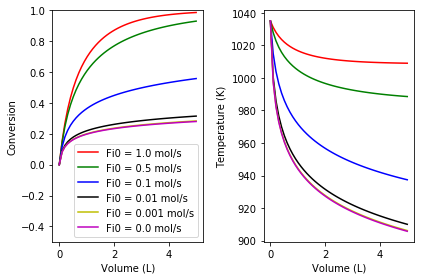

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Fa0 = 0.0376      # mol/s
Ca0 = 0.0188      # mol / L

v0 = Fa0 / Ca0    # initial volumetric flow
Ft0 = Fa0

T0 = 1035.0       # K

Hrxn_298 = 80.77  # kJ/mol at 298K
Cpa = 0.1630      # kJ/mol/K
Cpb = 0.083
Cpc = 0.071
Cpi = 0.100       # inert

def adiabatic_pfr(Y, V, Fi0):
    Fa, T = Y  # unpack variables

    extent = (Fa - Fa0) / (-1.0)
    Fb = extent
    Fc = extent

    Ft = Fa + Fb + Fc + Fi0
    Ft0 = Fa0 + Fi0

    v = v0 * Ft / Ft0 * T / T0

    k = np.exp(34.3 - 34222.0 / T)
    Ca = Fa / v
    r = k * Ca
    ra = -r
    Hrxn = Hrxn_298 + (Cpb + Cpc - Cpa) * (T - 298.0)

    dFadV = ra
    dTdV = (-Hrxn * r) / (Fa * Cpa + Fb * Cpb + Fc * Cpc + Fi0 * Cpi)

    return [dFadV, dTdV]


Vspan = np.linspace(0, 5) # volume in L
Y0 = [Fa0, T0]

# we examine three flow rates of inerts
colors = 'rgbkym'  # colors to make each solution
for i, Fi0 in enumerate([1.0, 0.5, 0.1, 0.01, 0.001, 0.0]):
    sol = odeint(adiabatic_pfr, Y0, Vspan, args=(Fi0,))

    Fa = sol[:, 0]
    T = sol[:, 1]

    X = ((Fa - Fa0) * (-1) / Fa0)

    plt.subplot(1,2,1)
    plt.plot(Vspan, X,  label='Fi0 = {0} mol/s'.format(Fi0), color=colors[i])
    plt.xlabel('Volume (L)')
    plt.ylabel('Conversion')

    plt.subplot(1,2,2)
    plt.plot(Vspan, T,  label='Fi0 = {0} mol/s'.format(Fi0), color=colors[i])
    plt.xlabel('Volume (L)')
    plt.ylabel('Temperature (K)')

plt.subplot(1,2,1)
plt.ylim([-0.5, 1])
plt.legend(loc='best')

plt.subplot(1,2,2)
#plt.legend(loc='best')

plt.tight_layout()
plt.show()
plt.savefig('images/adiabatic-pfr-inerts.png')


-   Note that now we can get much higher conversion

-   The downside is we have a high concentration of inerts

-   There may be separation costs to consider

-   There will be increased flow rates due to the extra molar flow
    -   May have to consider pressure drops

-   A similar behavior is observed with exothermic reactions

-   The inert gas can *absorb* heat from the reaction




## Constant temperature heat exchanger



-   We can avoid the need for inert thermal buffers by using heat exchangers

-   The simplest heat exchanger for the PFR is an ambient exchanger

-   The PFR is embedded in a constant temperature environment

-   We will typically describe $\dot{Q} = U a (T_a - T)$

-   The energy balance is

\begin{equation}
\frac{dT}{dV} = \frac{-\Delta H_{rx}(T) r + U a (T_a - T)}{\sum F_i C_{p,i}}
\end{equation}

-   We choose a sign convention so that we *add* $\dot{Q}$

-   If $T_a > T$ we expect the contribution to $\frac{dT}{dV}$ to be positive, i.e. the temperature increases.

-   Let us reconsider the last example, with no inerts but in an ambient heat exchanger with

-   Ua = 0.0165 kJ/L/s/K

-   T\_a = 1150 K

-   The heat exchanger is hotter than the feed, so we anticipate it should transfer heat to the reactor

-   That should counterbalance the loss of temperature due to the endothermic reaction



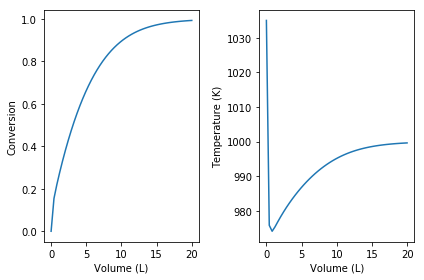

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Fa0 = 0.0376      # mol/s
Ca0 = 0.0188      # mol / L

v0 = Fa0 / Ca0    # initial volumetric flow
Ft0 = Fa0

T0 = 1035.0       # K

Hrxn_298 = 80.77  # kJ/mol at 298K
Cpa = 0.1630      # kJ/mol/K
Cpb = 0.083
Cpc = 0.071

Ta = 1000.0       # ambient heat exchanger temperature
Ua = 0.0165       # overall heat transfer coefficient

def pfr(Y, V):
    Fa, T = Y  # unpack variables

    extent = (Fa - Fa0) / (-1.0)
    Fb = extent
    Fc = extent

    Ft = Fa + Fb + Fc

    v = v0 * Ft / Ft0 * T / T0

    k = np.exp(34.3 - 34222.0 / T)
    Ca = Fa / v
    r = k * Ca
    ra = -r
    Hrxn = Hrxn_298 + (Cpb + Cpc - Cpa) * (T - 298.0)

    dFadV = ra

    Qdot = Ua * (Ta - T)
    dTdV = (-Hrxn * r + Qdot) / (Fa * Cpa + Fb * Cpb + Fc * Cpc)

    return [dFadV, dTdV]


Vspan = np.linspace(0, 20) # volume in L
Y0 = [Fa0, T0]

sol = odeint(pfr, Y0, Vspan)

Fa = sol[:, 0]
T = sol[:, 1]

X = ((Fa - Fa0) * (-1) / Fa0)

plt.subplot(1,2,1)
plt.plot(Vspan, X)
plt.xlabel('Volume (L)')
plt.ylabel('Conversion')

plt.subplot(1,2,2)
plt.plot(Vspan, T)
plt.xlabel('Volume (L)')
plt.ylabel('Temperature (K)')

plt.tight_layout()
plt.show()


-   Note that now we get complete conversion at a low reactor volume

-   There is initially a drop in temperature where the reaction rate is fast near the entrance of the reactor

-   As the rate slows due to consumption of A, the temperature increases until it is the same as the ambient heat exchanger

-   Ambient heat exchangers are simple, but not particularly efficient
    -   Energy goes into heating the entire stream




## Shell and tube cocurrent heat exchanger



-   A more sophisticated heat exchanger is a shell and tube design

-   We first consider the cocurrent design

![img](./images/cocurrent-shell-tube.png)

-   The temperature in the shell is not constant, it changes down the length of the tube

-   That means we need another equation for the temperature in the shell

-   All the heat that goes into the tube must come from the shell

-   So our energy balance on the shell becomes

\begin{equation}
\frac{dT_{shell}}{dV} = \frac{-\dot{Q}}{\dot{m} C_{p,coolant}}
\end{equation}

-   where $\dot{m}$ is the mass flow of coolant
-   $C_{p,coolant}$ is the heat capacity (on mass basis of coolant)
-   $T$  is the tube temperature
-   This simply adds a third equation

-   It is coupled to the energy balance of the tube through $T$

-   Let us use a molar flow rate of 1 mol / s coolant with a heat capacity of 0.0345 kJ / mol / K in a cocurrent tube and shell reactor

-   This is still a set of ordinary differential equations, with initial conditions on each variable.



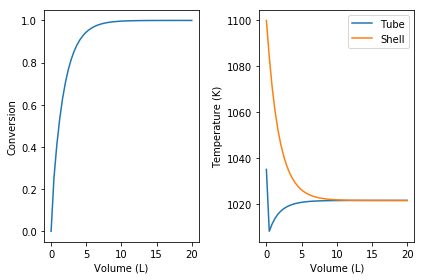

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Fa0 = 0.0376      # mol/s
Ca0 = 0.0188      # mol / L

v0 = Fa0 / Ca0    # initial volumetric flow
Ft0 = Fa0

T0 = 1035.0       # K

Hrxn_298 = 80.77  # kJ/mol at 298K
Cpa = 0.1630      # kJ/mol/K
Cpb = 0.083
Cpc = 0.071

Tshell0 = 1100.0    # ambient heat exchanger temperature
Ua = 0.0165         # overall heat transfer coefficient
mdot = 1          # mol/s coolant flow rate
Cpcoolant = 0.0345  # Heat capacity of coolant

def pfr(Y, V):
    Fa, T, Tshell = Y  # unpack variables

    extent = (Fa - Fa0) / (-1.0)
    Fb = extent
    Fc = extent

    Ft = Fa + Fb + Fc

    v = v0 * Ft / Ft0 * T / T0

    k = np.exp(34.3 - 34222.0 / T)
    Ca = Fa / v
    r = k * Ca
    ra = -r
    Hrxn = Hrxn_298 + (Cpb + Cpc - Cpa) * (T - 298.0)

    dFadV = ra

    Qdot = Ua * (Tshell - T)
    dTdV = (-Hrxn * r + Qdot) / (Fa * Cpa + Fb * Cpb + Fc * Cpc)
    dTshelldV = -Qdot / (mdot * Cpcoolant)

    return [dFadV, dTdV, dTshelldV]

Vspan = np.linspace(0, 20) # volume in L
Y0 = [Fa0, T0, Tshell0]
sol = odeint(pfr, Y0, Vspan)

Fa = sol[:, 0]
T = sol[:, 1]
Tshell = sol[:, 2]
X = ((Fa - Fa0) * (-1) / Fa0)

plt.subplot(1,2,1)
plt.plot(Vspan, X)
plt.xlabel('Volume (L)')
plt.ylabel('Conversion')

plt.subplot(1,2,2)
plt.plot(Vspan, T, label='Tube')
plt.plot(Vspan, Tshell, label='Shell')
plt.xlabel('Volume (L)')
plt.ylabel('Temperature (K)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

-   You can see the shell temperature decreases along the volume

-   The tube temperature initially dips slightly, then increases until the tube and shell temperatures are the same

-   At that point, there is no heat transfer between them




## Shell and tube countercurrent heat exchanger



-   Counter-current heat exchangers use heat more efficiently than co-current exchangers

![img](./images/counter-current-shell-tube.png)

-   You provide the greatest heat transfer where it is needed
    -   For an endothermic reaction this is where the reactor is coldest
    -   If you are cooling, this is where the reactor is the hottest

-   However, they are much harder problems to solve because we have:

\begin{align*}
F_A(0) &=& F_{A0} \\
T(V=0) &=& T_0 \\
T_{shell}(V=L) &=& T_{shell,inlet}
\end{align*}

-   In other words, we do not have an initial value problem anymore!

-   We have a boundary value problem

-   It is also the case that the energy balance on the shell is different than the cocurrent case by a sign change

-   This happens because the flow is going in the opposite direction as in the tube

\begin{equation}
\frac{dT_{shell}}{dV} = \frac{\dot{Q}}{\dot{m} C_{p,coolant}}
\end{equation}

-   Solving boundary value problems is generally difficult

-   A notable weakness in Python at the moment is the lack of strong boundary value problem solvers

-   Pycse has some capabilities for solving BVPs, but not this one

-   We use a simple, iterative shooting method here



1210.2045036


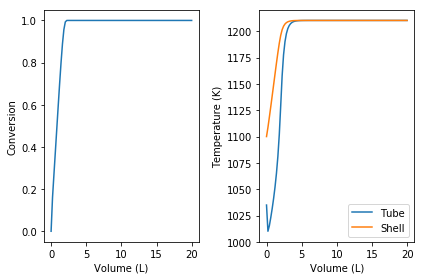

In [25]:
import numpy as np
import matplotlib.pyplot as plt

Fa0 = 0.0376      # mol/s
Ca0 = 0.0188      # mol / L

v0 = Fa0 / Ca0    # initial volumetric flow
Ft0 = Fa0

T0 = 1035.0       # K

Hrxn_298 = 80.77  # kJ/mol at 298K
Cpa = 0.1630      # kJ/mol/K
Cpb = 0.083
Cpc = 0.071

Tshell0 = 1100.0    # ambient heat exchanger temperature
Ua = 0.0165         # overall heat transfer coefficient
mdot = 1.0          # mol/s coolant flow rate
Cpcoolant = 0.0345  # Heat capacity of coolant


def pfr(Y, V):
    Fa, T, Tshell = Y

    extent = (Fa - Fa0) / (-1.0)
    Fb = extent
    Fc = extent

    Ft = Fa + Fb + Fc

    v = v0 * Ft / Ft0 * T / T0

    k = np.exp(34.3 - 34222.0 / T)
    Ca = Fa / v
    r = k * Ca
    ra = -r
    Hrxn = Hrxn_298 + (Cpb + Cpc - Cpa) * (T - 298.0)

    dFadV = ra

    Qdot = Ua * (Tshell - T)
    dTdV = (-Hrxn * r + Qdot) / (Fa * Cpa + Fb * Cpb + Fc * Cpc)
    dTshelldV = Qdot / (mdot * Cpcoolant)

    return [dFadV, dTdV, dTshelldV]

Vspan = np.linspace(0, 20, 100)  # volume in L

# you have to manually iterate on this value until Tshell[-1] == 1250
#Ta_guess = 1020  # for 0.5 mol/s coolant
Ta_guess = 1100   # for 1 mol/s coolant
Y0 = [Fa0, T0, Ta_guess]

from scipy.integrate import odeint
sol = odeint(pfr, Y0, Vspan)

Fa = sol[:, 0]
T = sol[:, 1]
Tshell = sol[:, 2]
print(Tshell[-1])
X = ((Fa - Fa0) * (-1) / Fa0)

plt.subplot(1, 2, 1)
plt.plot(Vspan, X)
plt.xlabel('Volume (L)')
plt.ylabel('Conversion')

plt.subplot(1, 2, 2)
plt.plot(Vspan, T, label='Tube')
plt.plot(Vspan, Tshell, label='Shell')
plt.xlabel('Volume (L)')
plt.ylabel('Temperature (K)')
plt.legend(loc='best')
plt.tight_layout()

plt.show()


-   This is a difficult problem to solve
    -   There is a steep change in T in the tube at the entrance

-   The shooting method is not ideal
    -   It is not always stable

-   But you need an initial guess for the solution otherwise
    -   The solution does not have an intuitive form so it is hard to guess

